In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
movie = pd.read_csv("./movies.csv")

movie.head(3)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0


In [5]:
movie.shape

(7668, 15)

In [6]:
movie.isnull().sum().sort_values(ascending=False)

budget      2171
gross        189
rating        77
company       17
runtime        4
score          3
votes          3
writer         3
country        3
released       2
star           1
name           0
genre          0
year           0
director       0
dtype: int64

In [ ]:
for col in movie:
    movie[col].fillna(value=0, inplace=True)


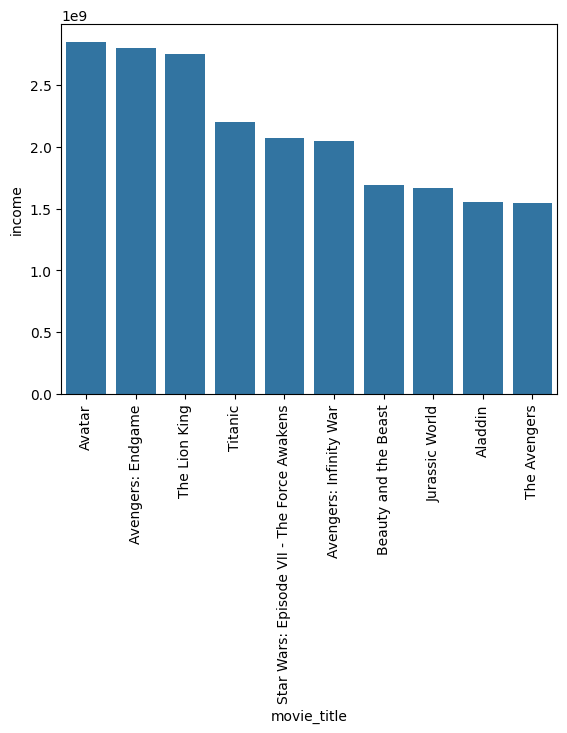

In [23]:
movie_name_gross = movie.groupby(movie["movie_title"])["income"].sum().sort_values(ascending=False).head(10)
sns.barplot(x=movie_name_gross.index, y=movie_name_gross)
plt.xticks(rotation=90)
plt.show()

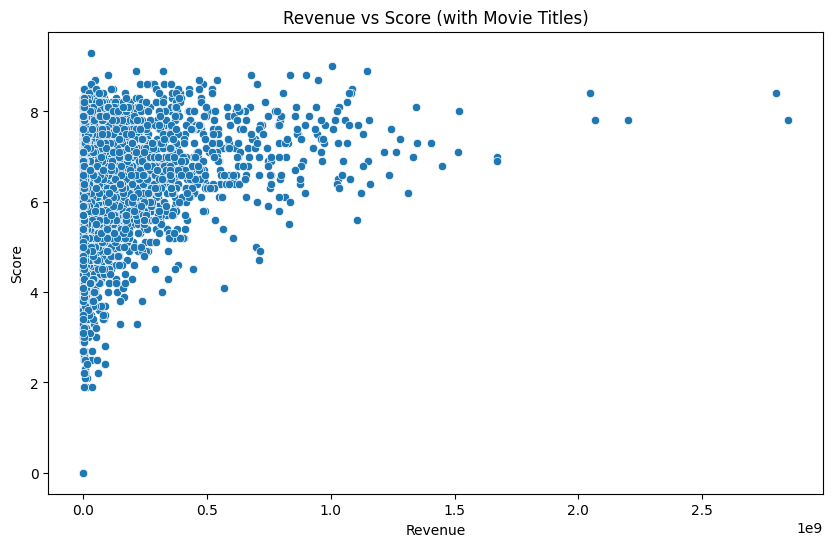

In [28]:
score_income_corralation = movie["score"].corr(movie["income"])
plt.figure(figsize=(10, 6))

sns.scatterplot(data=movie, x='income', y='score')

plt.title('Revenue vs Score (with Movie Titles)')
plt.xlabel('Revenue')
plt.ylabel('Score')
plt.show()

In [17]:
movie.rename(columns={"name":"movie_title", "gross":"income"}, inplace=True)

<Axes: xlabel='income', ylabel='votes'>

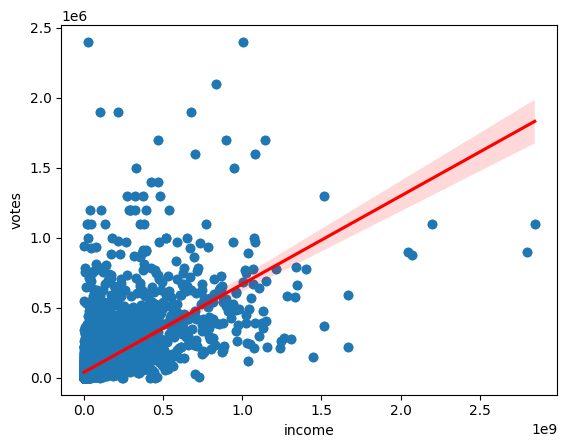

In [18]:
plt.scatter(x=movie["income"], y=movie["votes"])
sns.regplot(x="income", y="votes", data=movie, line_kws={"color":"Red"})

In [19]:
# Checking for the corralation between Gross and Votes

gross_votes_corr = movie["income"].corr(movie["votes"])
print(f"Corralation between gross and votes {gross_votes_corr}")

Corralation between gross and votes 0.6328696710026617


In [25]:
num_columns = movie.select_dtypes(exclude="object")

<Axes: >

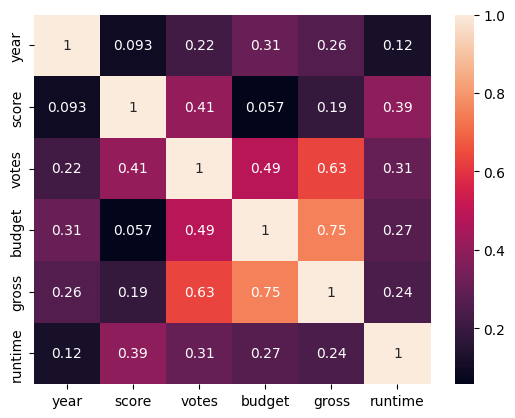

In [29]:
matrix_corr = movie.corr(numeric_only=True)

sns.heatmap(matrix_corr, annot=True)

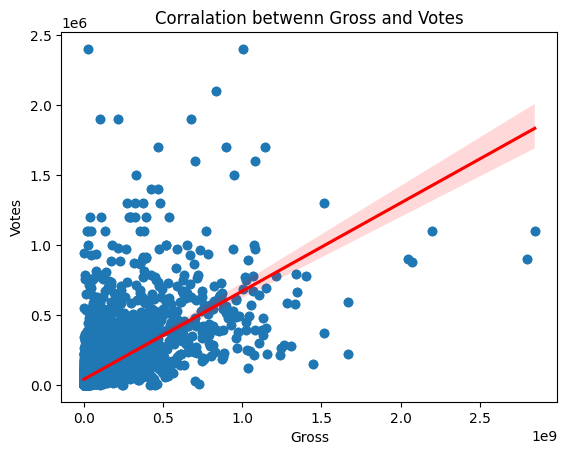

In [33]:
plt.scatter(x=movie["gross"], y=movie["votes"])
sns.regplot(x=movie["gross"], y=movie["votes"], line_kws={"color":"Red"})
plt.title("Corralation betwenn Gross and Votes")
plt.ylabel("Votes")
plt.xlabel("Gross")
plt.show()

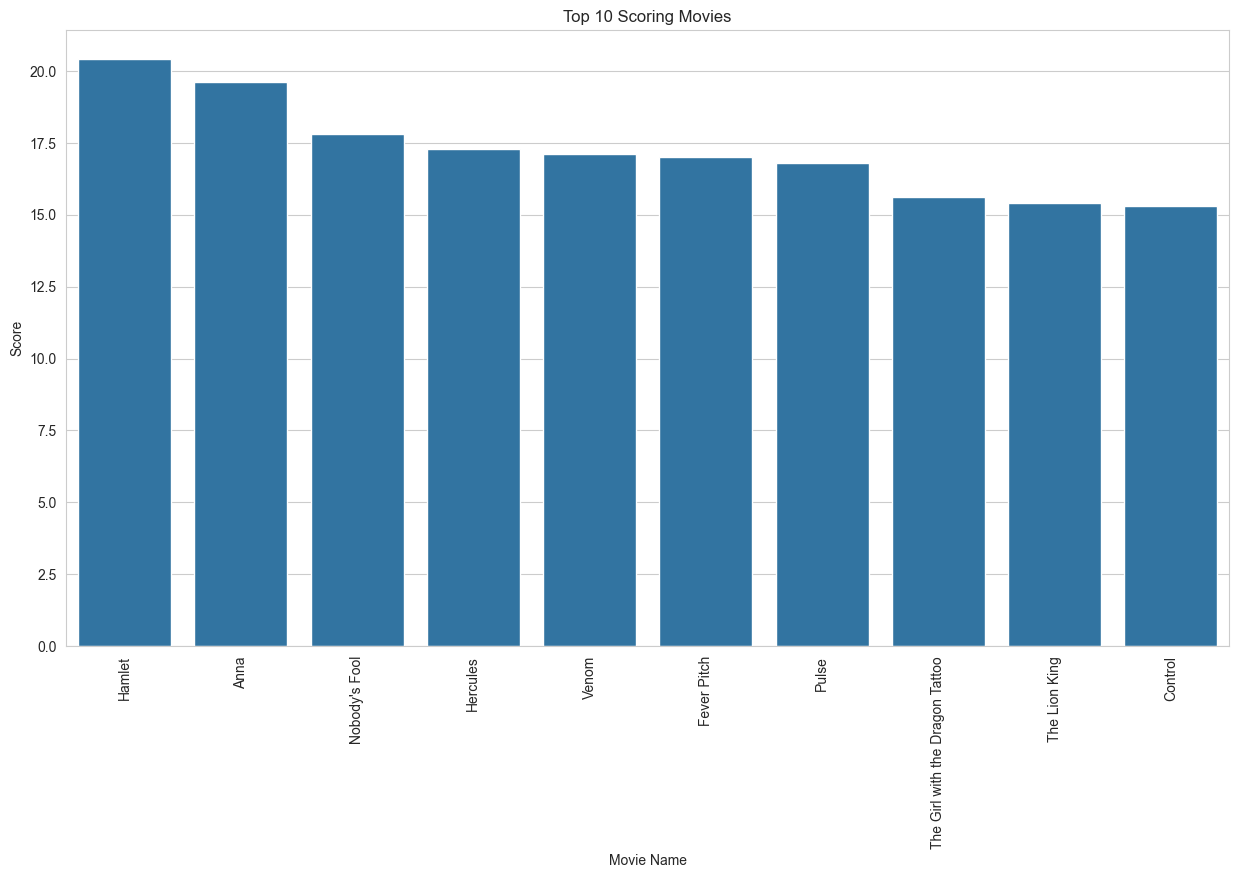

In [65]:
sns.set_style('whitegrid') 

highest_score_movie = movie.groupby(movie["name"])["score"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(15, 8))
plt.xticks(rotation=90)
sns.barplot(x=highest_score_movie.index, y=highest_score_movie)
plt.title("Top 10 Scoring Movies")
plt.xlabel("Movie Name")
plt.ylabel("Score")
plt.show()

In [50]:
movie.duplicated().sum()

0

In [67]:
movie["genre"].describe()


count       7668
unique        19
top       Comedy
freq        2245
Name: genre, dtype: object

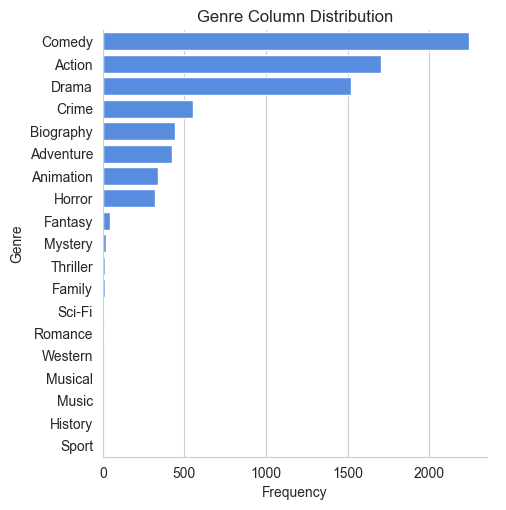

In [72]:
sns.catplot(y="genre", data=movie, kind="count", color = '#4287f5', order=movie["genre"].value_counts().index)
plt.title("Genre Column Distribution")
plt.xlabel("Frequency")
plt.ylabel("Genre")
plt.show()

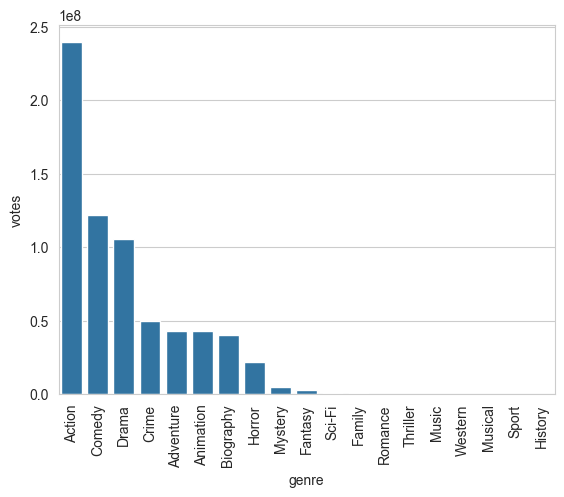

In [78]:
top_genre_votes  = movie.groupby(movie["genre"])["votes"].sum().sort_values(ascending=False)

plt.xticks(rotation=90)
sns.barplot(x=top_genre_votes.index, y=top_genre_votes)
plt.show()

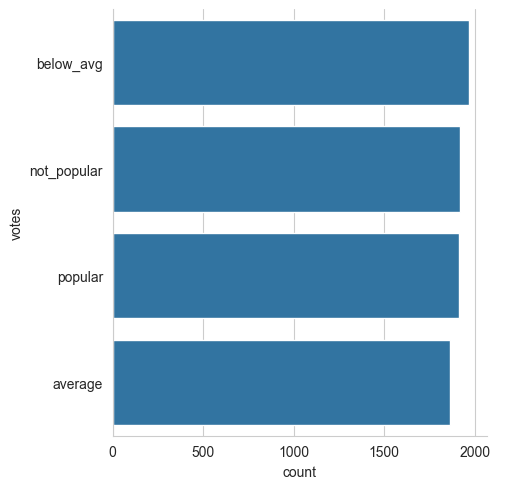

In [85]:
sns.catplot(y="votes", data=movie, order=movie["votes"].value_counts().index, kind="count")
plt.show()

In [86]:
movie.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [90]:
# Longest Movie

duration_matters = movie.groupby(movie["name"])["runtime"].sum().sort_values(ascending=False)

duration_matters

name
Hamlet                           489.0
The Best of Youth                366.0
Little Dorrit                    357.0
Nobody's Fool                    327.0
Anna                             317.0
                                 ...  
The Business of Show Business     55.0
One for the Money                  0.0
Saw: The Final Chapter             0.0
The Wolfman                        0.0
Saving Mbango                      0.0
Name: runtime, Length: 7512, dtype: float64

In [91]:
top_rated_movie = movie.groupby(["name","genre"])["rating"].value_counts()
top_rated_movie

name                        genre   rating
'71                         Action  R         1
'Round Midnight             Drama   R         1
'night, Mother              Drama   PG-13     1
*batteries not included     Comedy  PG        1
10 Cloverfield Lane         Action  PG-13     1
                                             ..
eXistenZ                    Horror  R         1
xXx                         Action  PG-13     1
xXx: Return of Xander Cage  Action  PG-13     1
xXx: State of the Union     Action  PG-13     1
Æon Flux                    Action  PG-13     1
Name: count, Length: 7625, dtype: int64

In [92]:
movie.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,popular,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,average,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,popular,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,popular,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,popular,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [94]:
budget_score_corr = movie["budget"].corr(movie["score"])
print(budget_score_corr)

0.056862523109757236


In [99]:
budget_dependance= movie.groupby(movie["score"])["budget"].value_counts().sort_values(ascending=False)
budget_dependance

score  budget    
6.7    0.0           100
6.6    0.0            95
6.2    0.0            90
6.5    0.0            88
6.4    0.0            87
                    ... 
6.1    68000000.0      1
       65000000.0      1
       57000000.0      1
       49000000.0      1
9.3    25000000.0      1
Name: count, Length: 2725, dtype: int64

In [30]:
movie["released_year"] = movie["released"].str.extract(r'(\d{4})')

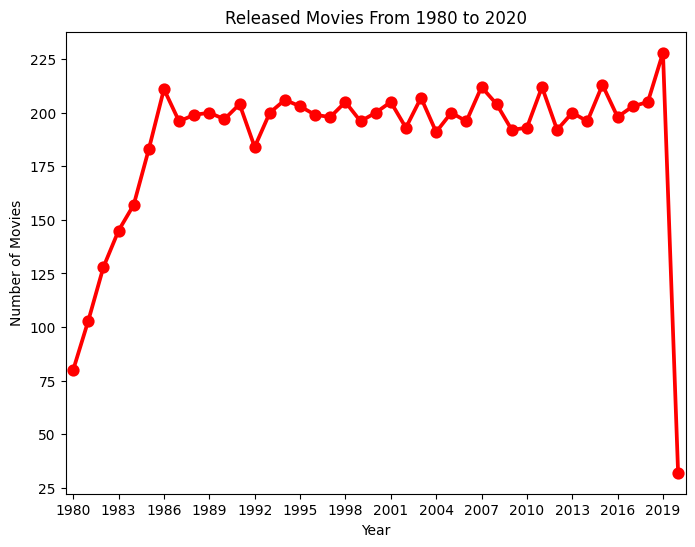

In [43]:
top_released_movies =movie["released_year"].value_counts().sort_index(ascending=True)

plt.figure(figsize=(8,6))
sns.pointplot(x=top_released_movies.index, y=top_released_movies, color="Red")
plt.title("Released Movies From 1980 to 2020")
years = top_released_movies.index
plt.xticks(range(0, len(years), 3), years[::3])
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.show()